<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/groupassignment2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# basic information
print("=== Train  ===")
train_df.info()
print("\nTrain ：")
print(train_df.head())

print("\n=== Test  ===")
test_df.info()
print("\nTest ：")
print(test_df.head())

# missing value
print("\nTrain ：")
print(train_df.isnull().sum())

print("\nTest ：")
print(test_df.isnull().sum())


=== Train  ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41233 entries, 0 to 41232
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tappingsteelgrade     41233 non-null  object 
 1   force_meas            41233 non-null  float64
 2   speed                 41233 non-null  float64
 3   entrytemperature      41233 non-null  float64
 4   entrytemperaturebot   41233 non-null  float64
 5   entrytemperaturecore  41233 non-null  float64
 6   entrytemperaturetop   41233 non-null  float64
 7   entrythickness        41233 non-null  float64
 8   entrywidth            41233 non-null  float64
 9   exitthickness         41233 non-null  float64
 10  zeropoint             41233 non-null  float64
 11  radius                41233 non-null  float64
 12  pctal                 41233 non-null  float64
 13  pctb                  41233 non-null  float64
 14  pctc                  41233 non-null  float64
 15  pctc

In [2]:
print(train_df.describe())

         force_meas         speed  entrytemperature  entrytemperaturebot  \
count  4.123300e+04  41233.000000      41233.000000         41233.000000   
mean   5.010631e+07      3.780223        886.081645           867.309159   
std    1.350252e+07      0.945911         70.354180            65.595977   
min    6.422410e+06      0.248886        690.070873           688.460194   
25%    4.005071e+07      2.999325        835.002641           818.689695   
50%    4.838636e+07      3.704202        877.906263           861.588910   
75%    5.980562e+07      4.482272        931.859967           913.013787   
max    8.830902e+07      6.907368       1148.757992          1086.236252   

       entrytemperaturecore  entrytemperaturetop  entrythickness  \
count          41233.000000         41233.000000    41233.000000   
mean             900.371000           854.079046        0.040976   
std               75.792914            63.192521        0.026589   
min              691.754957           685.9

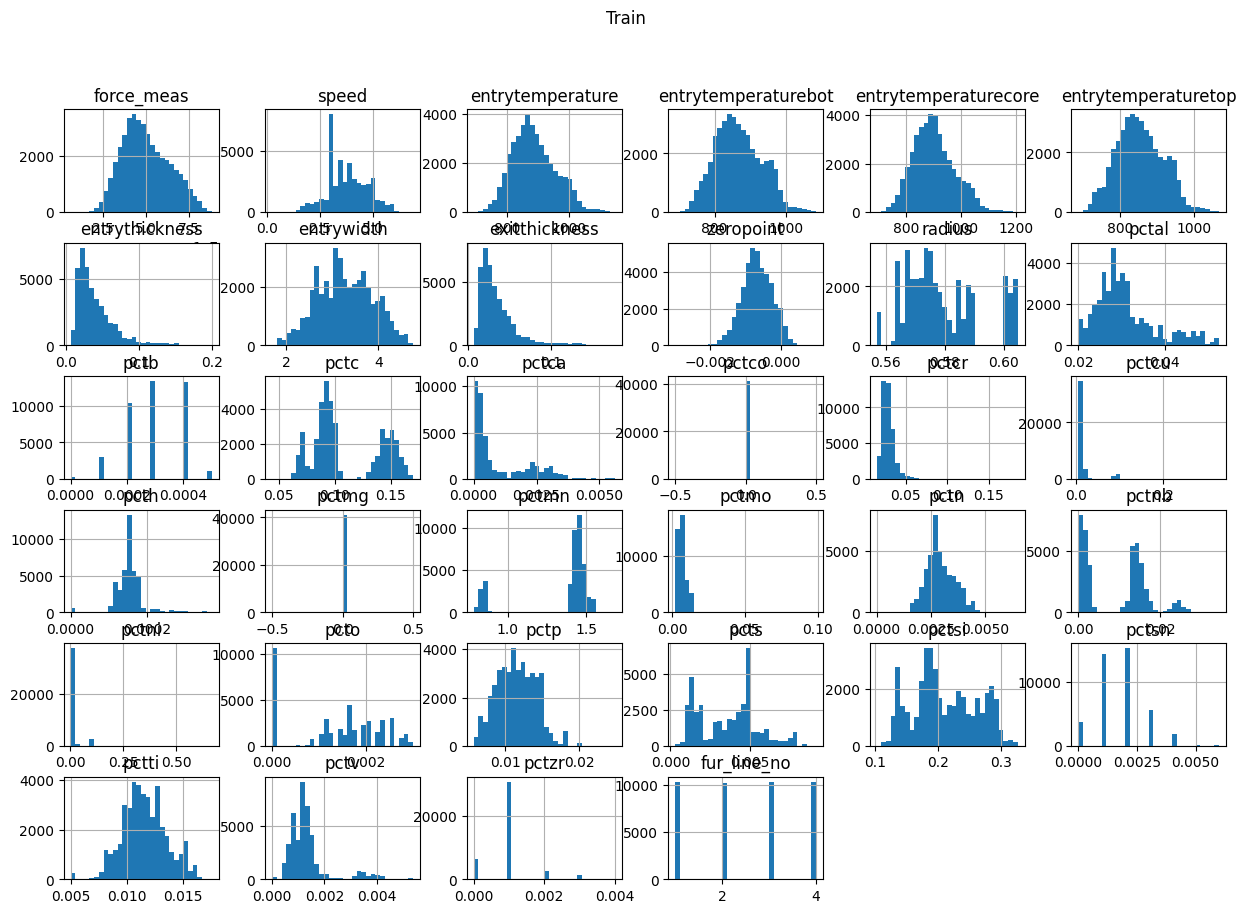

In [3]:
train_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Train")
plt.show()

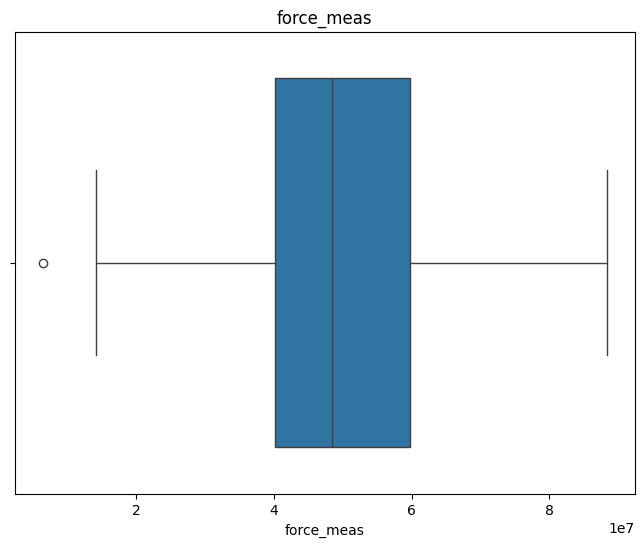

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['force_meas'])
plt.title("force_meas")
plt.show()